1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal
distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 1.380952380952381 => It's not significant.


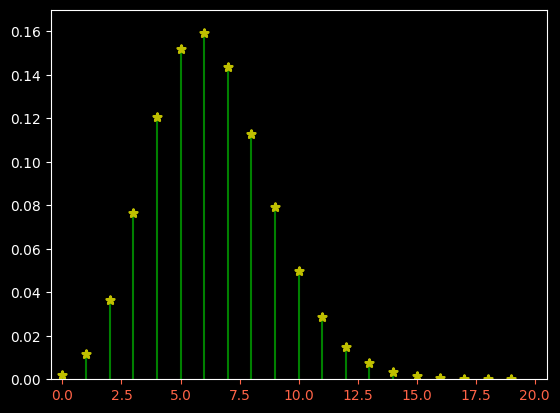

In [131]:
import scipy.stats as sct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#Poisson pdf => mean = variance
mu = 6.3
k = [x for x in range(0, 20)]
probs = sct.poisson(mu=mu).pmf(k=k)
plt.scatter(k, probs, color="y", marker="*", zorder=2, linewidths=1.75)
plt.vlines(k, 0, probs, color="green", zorder=1)
plt.ylim(0, .17)
plt.xlim(-.5, 20.5)
plt.tick_params(axis="x", colors="tomato")
Z = (15 - mu) / mu
print(f"{Z = } => It's not significant.")
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following
exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual.
The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic
blood pressure reading was recorded for each individual. The results are presented in the following data set:

```
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [36]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma = np.sqrt(0.5 * (np.var(post, ddof=1) + np.var(post, ddof=1)))
n = len(pre)
T = (np.mean(pre) - np.mean(post)) / (sigma * np.sqrt(2 / n))
print(f"{T = }")
pvalue = sct.t.cdf(T, n - 1) + (1. - sct.t.cdf(-T, n - 1))
print(f"{pvalue = }")
print("Null hypothesis is" + (pvalue <= 0.25))

T = -3.3449793002007255
pvalue = 0.008591857780867174


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population
of these animals.

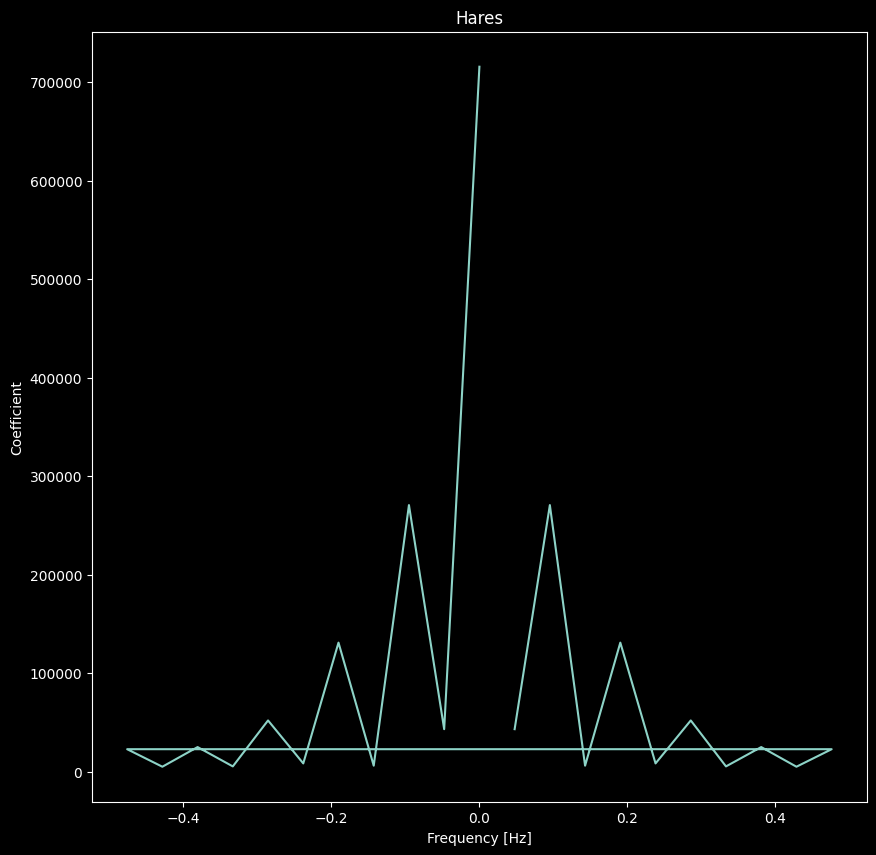

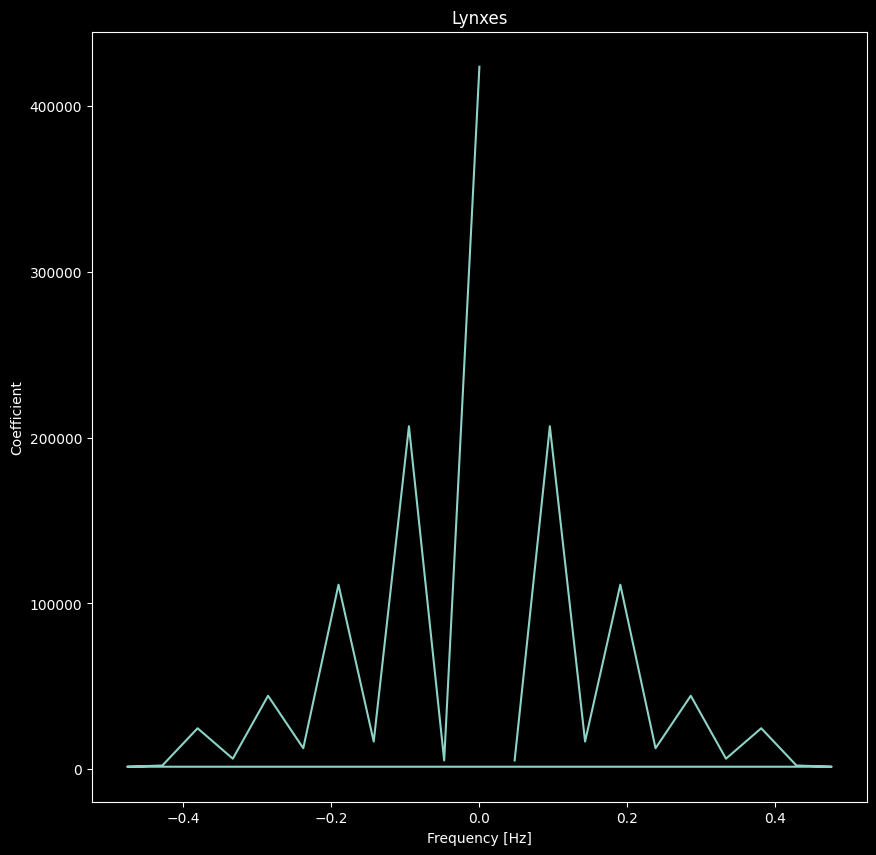

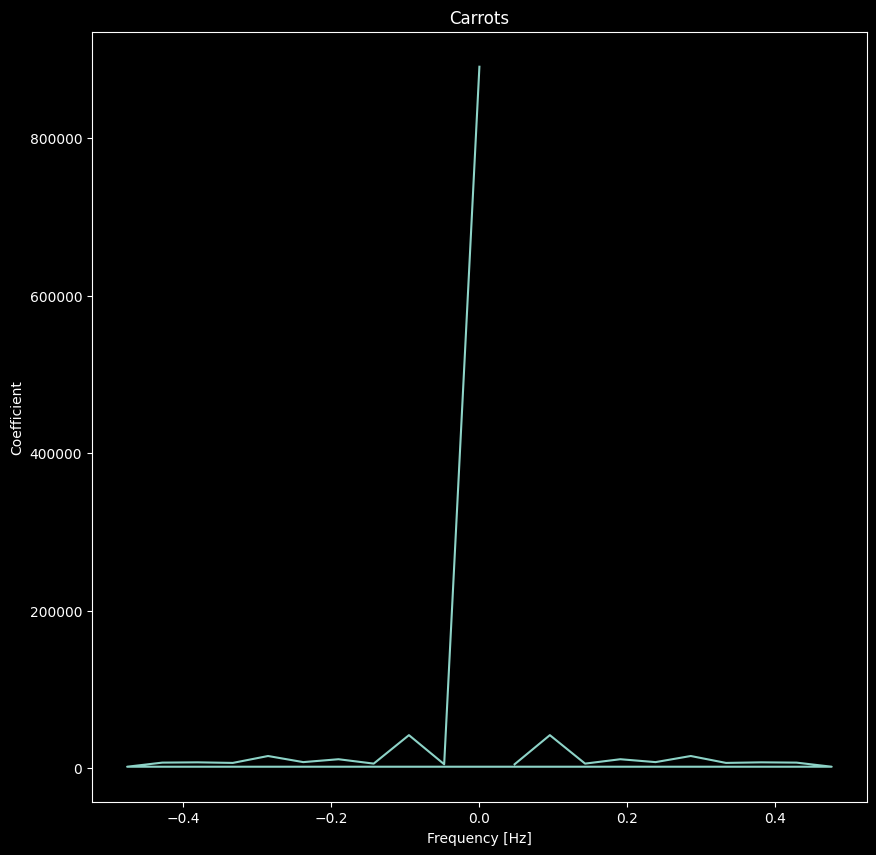

In [147]:
from scipy import fftpack

data = np.loadtxt("./data/populations.txt")
time = np.array(data[:, 0], dtype=int)
time_step = time[1] - time[2]
hares = np.array(data[:, 1], dtype=int)
lynx = np.array(data[:, 2], dtype=int)
carrot =  np.array(data[:, 3], dtype=int)

def own_fft(sig, title):
    # The FFT of the signal
    sig_fft = fftpack.fft(sig)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

    # The return the corresponding frequencies
    sample_freq = fftpack.fftfreq(sig.size, d=time_step)

    # Plot the FFT power
    plt.figure(figsize=(10, 10))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Coefficient')
    plt.title(title)
    plt.show()

own_fft(hares, "Hares")
own_fft(lynx, "Lynxes")
own_fft(carrot, "Carrots")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`,
which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum
(Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those
which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [148]:
plt.imread("moonlanding.png")


FileNotFoundError: [Errno 2] No such file or directory: 'moonlanding.png'